In [1]:
from Sperm_class import SpermGroup
from Mesh_class import process_file

In [2]:
mesh = process_file('sr-mesh-v1.txt')

500
250


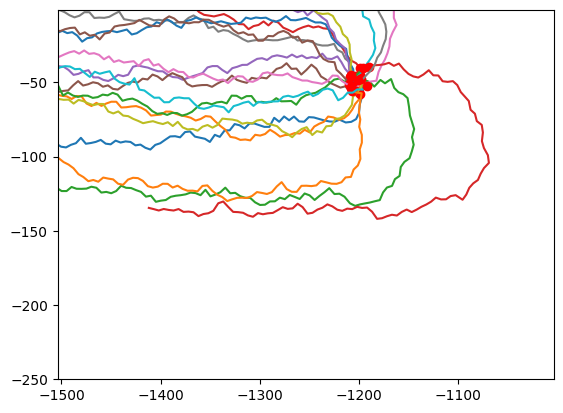

In [3]:
sperms = SpermGroup(20, mesh)
sperms.gen_around_point((-1200,-50), 10)
sperms.simulation(steps =100, step_size = 5, noise_power = 2)
sperms.plot()

In [ ]:
from mesh_import import txt_to_dict

In [ ]:
from scipy.interpolate import LinearNDInterpolator

In [ ]:
dict1, mesh,intq,int1 = txt_to_dict('sr-mesh-v1.txt')

In [ ]:
mesh

In [ ]:
import pandas as pd

In [ ]:
from itertools import product

In [ ]:
def create_grid(
        x: pd.Series,
        y: pd.Series,
        z_param: pd.Series,
        grid_step_x: int = 100,
        grid_step_y: int = 100,
        method: str = 'linear',
        grid_size: float = 1
        ) -> pd.DataFrame:
    
    grid_size = 1
    grid_step_x = round((x.max()-x.min())/grid_size)
    grid_step_y = round((y.max()-y.min())/grid_size)
    print(grid_step_x)
    print(grid_step_y)
    
    x_coord_range = np.linspace(x.min(), x.max(), grid_step_x)
    y_coord_range = np.linspace(y.min(), y.max(), grid_step_y)

    XY = list(product(x_coord_range, y_coord_range))
    XY = np.asarray(XY)

    interpolation = LinearNDInterpolator(
            points=(x.values, y.values),
            values=z_param.values
            )

    Z = interpolation(x.values,y.values)
    df = pd.DataFrame(columns=["x", "y", z_param.name], )
    df["x"] = XY[:, 0]
    df["y"] = XY[:, 1]
    df[z_param.name] = Z

    return interpolation , df

In [ ]:
x = mesh_df['x'] * 1e6
y = mesh_df['y'] * 1e6
z_param = mesh_df['Shear']

In [ ]:
x

In [ ]:
grid_size = 1
grid_step_x = round((x.max()-x.min())/grid_size)
grid_step_y = round((y.max()-y.min())/grid_size)

In [ ]:
print(grid_step_x)
print(grid_step_y)

In [ ]:
x_coord_range = np.linspace(x.min(), x.max(), grid_step_x)
y_coord_range = np.linspace(y.min(), y.max(), grid_step_y)

XY = list(product(x_coord_range, y_coord_range))
XY = np.asarray(XY)

In [ ]:
XY

In [ ]:
interpolation = LinearNDInterpolator(
            points=(x.values, y.values),
            values=z_param.values
            )

In [ ]:
Z = interpolation(XY[:,0],XY[:,1])

In [ ]:
XY[:,0]

In [ ]:
Z.size

In [ ]:
df = pd.DataFrame(columns=["x", "y", z_param.name], )
df["x"] = XY[:, 0]
df["y"] = XY[:, 1]
df[z_param.name] = Z

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
type(interpolation)

In [ ]:
coord = (-1036.57, -150.78)
interpolation(coord)

In [ ]:
interpolation([-1235.],[-100])

In [ ]:
plt.scatter(df['x'], df['y'], c = df['Shear'])

In [ ]:
import numpy as np

In [ ]:
mesh_df = pd.DataFrame(mesh)

In [ ]:
create_grid(mesh_df['x'], mesh_df['y'], mesh_df['Shear'])

In [ ]:
mesh_points = (mesh.mesh['x'].values, mesh.mesh['y'].values)
mesh_points

In [ ]:
x = mesh.imported_mesh['x']
y = mesh.imported_mesh['y']
grid_size = 1
grid_step_x = round((x.max()-x.min())/grid_size)
grid_step_y = round((y.max()-y.min())/grid_size)
x_coord_range = np.linspace(x.min(), x.max(), grid_step_x)
y_coord_range = np.linspace(y.min(), y.max(), grid_step_y)
m_points = (x_coord_range, y_coord_range)
grid_points = np.meshgrid(*m_points, indexing='ij')

In [ ]:
from scipy.interpolate import griddata

In [ ]:
interpolate = griddata((x.values, y.values), mesh.imported_mesh['Shear'].values, grid_points)

In [ ]:
x

In [ ]:
import numpy as np
def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]
rng = np.random.default_rng()
points = rng.random((1000, 2))
values = func(points[:,0], points[:,1])

In [ ]:
grid_x

In [ ]:
points

In [ ]:
value_func_3d(*np.meshgrid(*points, indexing='ij'))

In [ ]:
np.meshgrid(*points, indexing='ij')

In [ ]:
points

In [ ]:
mesh.plot()

In [ ]:
plt.scatter(df['x'], df['y'], c = df['Shear'])

In [ ]:
mesh.imported_mesh

In [ ]:
sperms = SpermGroup(10, mesh)

In [ ]:
sperms.gen_around_point((-1300,-5), 1)

In [ ]:
sperms.simulation(100, step_size = 5, noise_power = 2)

In [ ]:
getattr(sperms, 'plot')

In [ ]:
sperms.plot()

In [ ]:
mesh.mesh['Shear'].isnull().sum()

In [ ]:
import pandas as pd

In [ ]:
#mesh2 = process_file('Data-sr.txt', plot='start_finish')

In [ ]:
from mesh_import import txt_to_dict

In [ ]:
dict1, dict2, int1, int2 = txt_to_dict('Data-sr.txt')

In [ ]:
from shapely.geometry import Polygon, Point
import alphashape

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x_multi = [i*1e6 for i in dict2['x']]
y_multi = [i*1e6 for i in dict2['y']]

In [ ]:
mpoints = [Point(X, Y) for X, Y in zip(x_multi, y_multi)]

In [ ]:
points_2d = list(zip(x_multi, y_multi))

In [ ]:
alpha=0.08
hull = alphashape.alphashape(points_2d, alpha)
hull

In [ ]:
type(hull)